In [1]:
import numpy as np
import pandas as pd 
import cv2 
from google.colab.patches import cv2_imshow

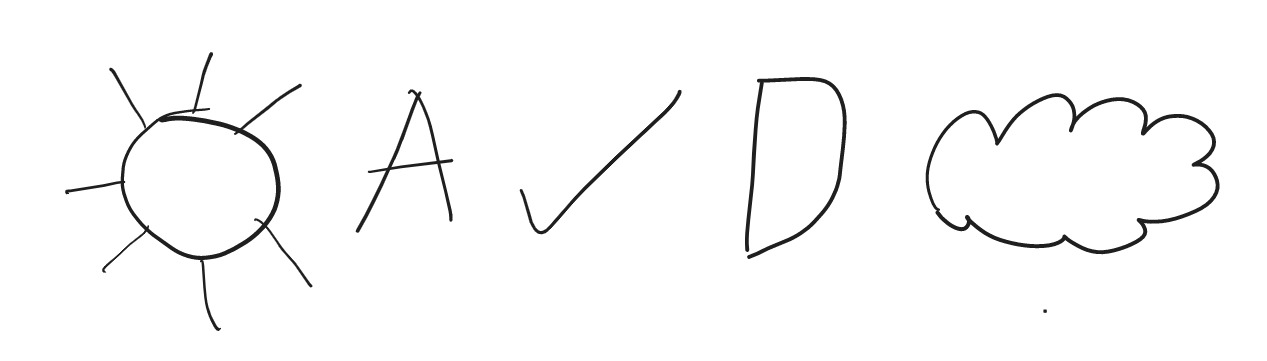

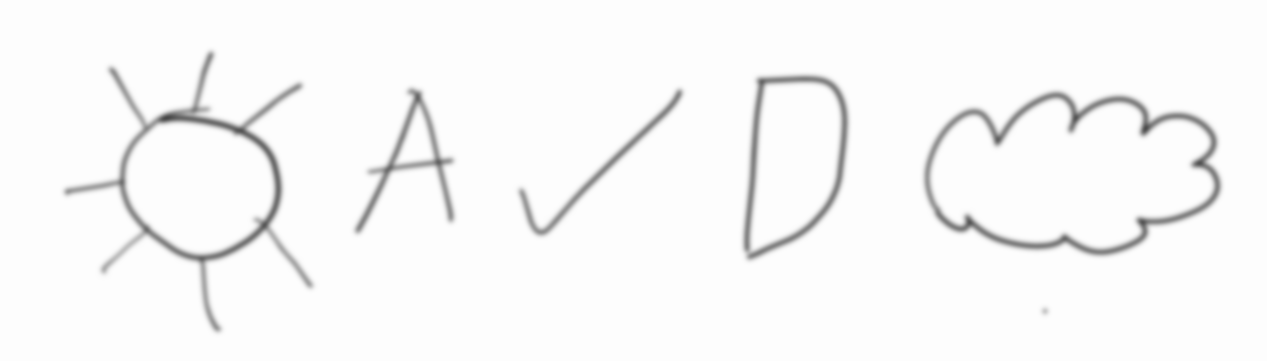

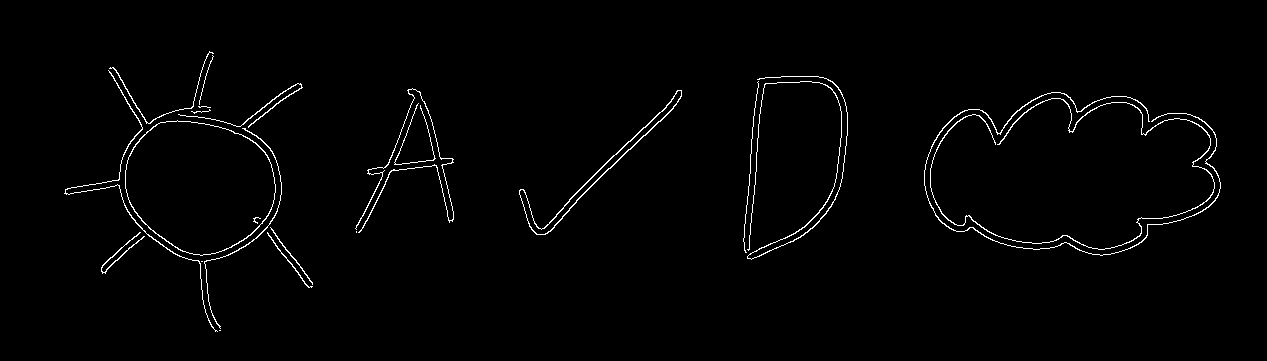

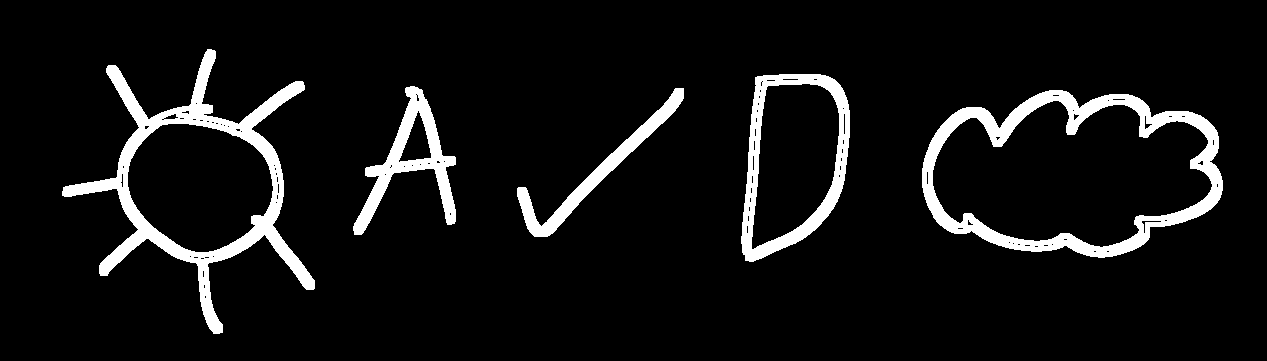

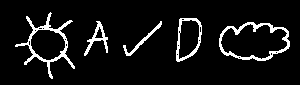

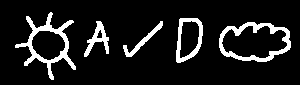

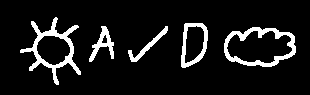

(85, 300)


In [2]:
img= cv2.imread('/content/image.png',1)

img6 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(img1,(5,5),0)
blur = cv2.GaussianBlur(img6,(15,15),0)           #removes disturbance, noise in image
edged = cv2.Canny(blur, 30, 150)                  #canny edge detection

# kernal = np.ones((5,5),dtype=np.uint8)
kernal = np.ones((5,5),dtype=np.uint8)
dilation = cv2.dilate(edged,kernal,iterations=1)


ht,wt=dilation.shape
defx=300
defh=defx*(ht/wt)

imgr = cv2.resize(dilation, (defx,(int)(defh)),interpolation = cv2.INTER_NEAREST)

kernal = np.ones((2,2),dtype=np.uint8)
dilation2 = cv2.dilate(imgr,kernal,iterations=1)
white = [0,0,0]
padig = cv2.copyMakeBorder(dilation2, 5, 5, 5,5, cv2.BORDER_CONSTANT,value=white)
cv2_imshow(img6)
cv2_imshow(blur)
cv2_imshow(edged)
cv2_imshow(dilation)
cv2_imshow(imgr)
cv2_imshow(dilation2)
cv2_imshow(padig)
print(imgr.shape)

1489.0   ### 20   17   61   68
293.0   ### 89   26   25   36
206.5   ### 128   26   40   36
908.5   ### 181   23   27   45
2187.0   ### 224   27   72   40


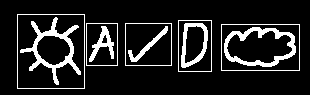

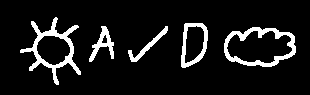

In [3]:
import imutils

def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)
 


#finding contours
cnts = cv2.findContours(padig.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

cnts = sort_contours(cnts, method="left-to-right")[0]   #Sorting contours from left to right 

oo=padig.copy()
jj=padig.copy()

#drawing bounding boxes of contours 
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
  
    roi = padig[y:y + h, x:x + w]

    #thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    (tH, tW) = roi.shape
    area=cv2.contourArea(c)
    
    if area>50:
     print(area," ","###",x," ",y," ",w," ",h)
     cv2.drawContours(oo,c,-1,(255,222,0),1)
     peri=cv2.arcLength(c,True)
     approx=cv2.approxPolyDP(c,0.01*peri,True)
     x, y, w, h=cv2.boundingRect(approx)
     cv2.rectangle(jj,(x-3,y-3),(x+w+3,y+h+3),(255,0,0),1)

cv2_imshow(jj)

cv2_imshow(oo)

